In [86]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
from typing import List


In [87]:
df = pd.read_csv("data/자치구별5대범죄/01-20_자치구별_5대범죄.csv")

In [88]:
df_quota = pd.read_csv(
    "./data/경찰청_경찰서별_경찰관현황/2014-2021_서울_경찰서별_정원.csv")

In [89]:
answer = []
for i, row in df.iterrows():
    year: int = row.year
    office: List[str] = eval(row["관할경찰서"])
    # print(office)
    # print(year)
    query = df_quota[(df_quota.ds == year)&(df_quota.office.isin(office))]
    if len(query) > 0 :
        answer.append(query.quota.sum())
    else:
        answer.append(pd.NA)
df["관할경찰서정원"] = answer

In [90]:
df

,year,자치구,죄종,발생검거,건수,관할경찰서,관할경찰서정원
0,2001,강남구,"강간,추행",검거,108,"['강남', '수서']",<NA>
1,2001,강남구,"강간,추행",발생,157,"['강남', '수서']",<NA>
2,2001,강남구,강도,검거,151,"['강남', '수서']",<NA>
3,2001,강남구,강도,발생,217,"['강남', '수서']",<NA>
4,2001,강남구,살인,검거,23,"['강남', '수서']",<NA>
...,...,...,...,...,...,...,...
4997,2020,중랑구,살인,발생,10,['중랑'],749
4998,2020,중랑구,절도,검거,889,['중랑'],749
4999,2020,중랑구,절도,발생,1506,['중랑'],749
5000,2020,중랑구,폭력,검거,1724,['중랑'],749


In [92]:
df_drop = df.dropna()

In [94]:
crime_cls = df_drop["죄종"].unique()

In [95]:
crime_cls

array(['강간,추행', '강도', '살인', '절도', '폭력'], dtype=object)

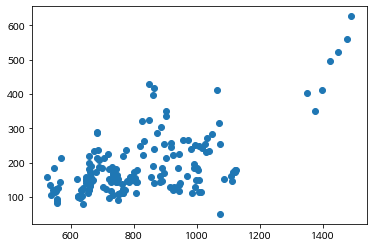

In [106]:
temp = df_drop[(df_drop["죄종"]=="강간,추행") &(df_drop["발생검거"]=="검거")  ]
plt.scatter(temp["관할경찰서정원"], temp["건수"])

,year,자치구,죄종,발생검거,건수,관할경찰서,관할경찰서정원
3251,2014,강남구,"강간,추행",발생,512,"['강남', '수서']",1351
3261,2014,강동구,"강간,추행",발생,148,['강동'],704
3271,2014,강북구,"강간,추행",발생,189,['강북'],621
3281,2014,강서구,"강간,추행",발생,214,['강서'],809
3291,2014,관악구,"강간,추행",발생,361,['관악'],776
...,...,...,...,...,...,...,...
4953,2020,용산구,"강간,추행",발생,230,['용산'],690
4963,2020,은평구,"강간,추행",발생,171,"['서부', '은평']",890
4973,2020,종로구,"강간,추행",발생,192,"['종로', '혜화']",1111
4983,2020,중구,"강간,추행",발생,186,"['중부', '남대문']",994


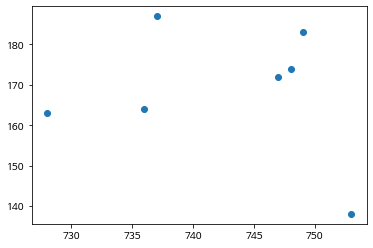

In [112]:
temp = df_drop[(df_drop["죄종"]=="강간,추행") &(df_drop["발생검거"]=="발생")  ]
temp = temp[ temp["자치구"] == "중랑구"] 
plt.scatter(temp["관할경찰서정원"], temp["건수"])